In [1]:
#Graphing Overall sentiment, player volume and player count

In [2]:
import json

In [3]:
import praw

In [4]:
from textblob import TextBlob

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import matplotlib as mpl

In [7]:
import datetime
from datetime import timedelta, timezone

In [8]:
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 100)
pd.set_option('display.max_colwidth', 500)

In [9]:
#IMPORT DATA

In [10]:
data_file = 'Game_Metrics.csv'

In [11]:
df = pd.read_csv(data_file)

In [12]:
df['Date'] = pd.to_datetime(df['Date'])

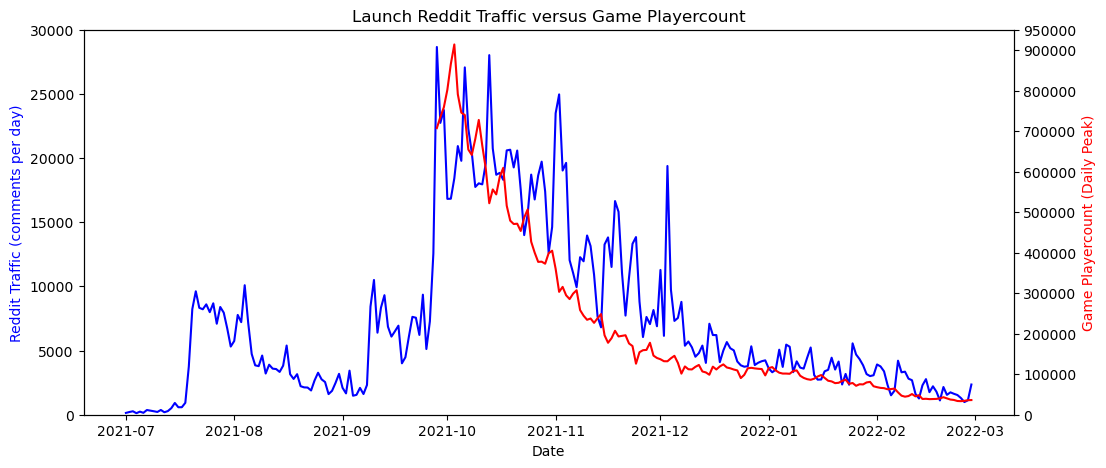

In [13]:
df_graph1 = df[:243]

# Create the left subplot
fig, ax1 = plt.subplots(figsize=(12, 5))
sns.lineplot(x='Date', y='Volume', ax=ax1, data=df_graph1, color='blue')

# Create the right subplot and link it to the left one
ax2 = ax1.twinx()
sns.lineplot(x='Date', y='Players', ax=ax2, data=df_graph1[89:], color='red')

# Set the y-labels for each subplot
ax1.set_ylabel('Reddit Traffic (comments per day)', color='blue')
ax1.set_ylim(0,30000)

ax2.set_ylabel('Game Playercount (Daily Peak)', color='red')
ax2.set_ylim(0,950000)
ax2.set_yticks([0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 950000])

plt.title("Launch Reddit Traffic versus Game Playercount")

# Show the plot
plt.show()

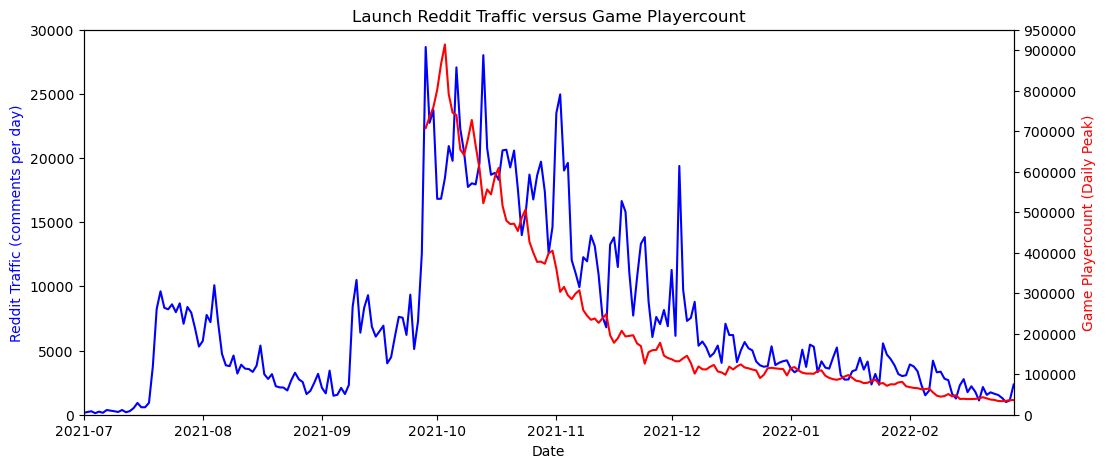

In [14]:
df_graph1 = df[:243]

# Create the left subplot
fig, ax1 = plt.subplots(figsize=(12, 5))
sns.lineplot(x='Date', y='Volume', ax=ax1, data=df_graph1, color='blue')

# Create the right subplot and link it to the left one
ax2 = ax1.twinx()
sns.lineplot(x='Date', y='Players', ax=ax2, data=df_graph1[89:], color='red')

# Set the y-labels for each subplot
ax1.set_ylabel('Reddit Traffic (comments per day)', color='blue')
ax1.set_ylim(0,30000)
ax1.set_xlim(df_graph1['Date'][0], df_graph1['Date'][242])

ax2.set_ylabel('Game Playercount (Daily Peak)', color='red')
ax2.set_ylim(0,950000)
ax2.set_yticks([0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 950000])

plt.title("Launch Reddit Traffic versus Game Playercount")

# Show the plot
plt.show()

In [15]:
df_graph2 = df[184:549]

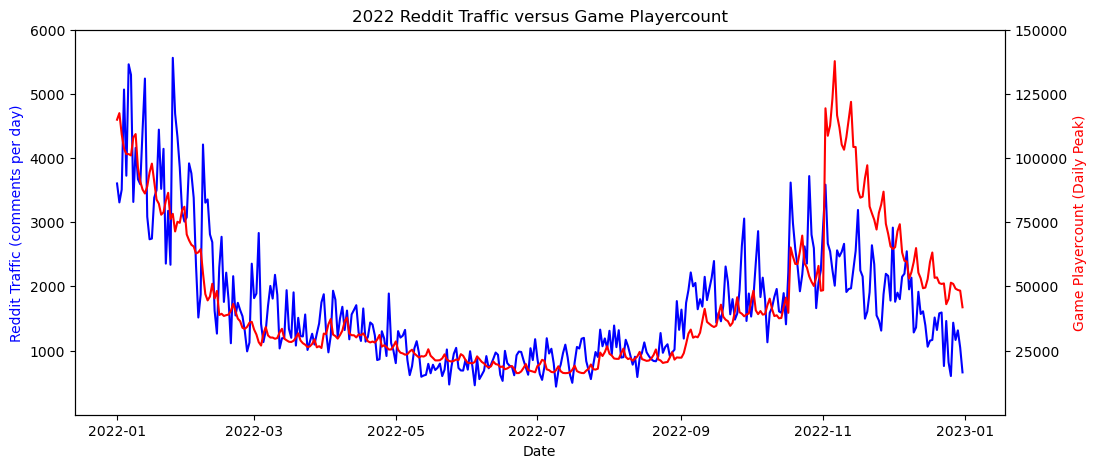

In [16]:
#Playercount & Volume 2022
# Create the left subplot
fig, ax1 = plt.subplots(figsize=(12, 5))
sns.lineplot(x='Date', y='Volume', ax=ax1, data = df_graph2, color='blue')

# Create the right subplot and link it to the left one
ax2 = ax1.twinx()
sns.lineplot(x='Date', y='Players', ax=ax2, data=df_graph2, color='red')

# Set the y-labels for each subplot
ax1.set_ylabel('Reddit Traffic (comments per day)', color='blue')
ax1.set_ylim(0,6000, 5)
ax1.set_yticks([1000, 2000, 3000, 4000, 5000, 6000])

ax2.set_ylabel('Game Playercount (Daily Peak)', color='red')
ax2.set_ylim(0,150000, 5)
ax2.set_yticks([25000, 50000, 75000, 100000, 125000, 150000])

plt.title("2022 Reddit Traffic versus Game Playercount")

# Show the plot
plt.show()

In [17]:
#WEEKLY DATA AND GRAPHS

In [18]:
df_weekly =  df.copy(deep=True)

In [19]:
df_weekly = df_weekly.set_index('Date')

In [20]:
df_weekly = df_weekly.resample('W').mean().groupby(pd.Grouper(freq='W')).mean()

In [21]:
df_weekly.index = df_weekly.index.date

In [22]:
def colorFader_Binary(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
   # print(f'got mix: {mix}')
    if mix <= 0.5:
        return 'red'  # Return red if mix is less than or equal to 50
    else:
        return "blue"  # Return blue if mix is greater than 50

In [23]:
# Define a function to set bar colors
def set_bar_colors(ax, data, color1, color2):
    bars = ax.containers
    patches = bars[0].patches
    for j in range(len(patches)):
            patches[j].set_facecolor(colorFader_Binary(color1, color2, data[j]))

In [24]:
df_graph3 = df_weekly[1:24]

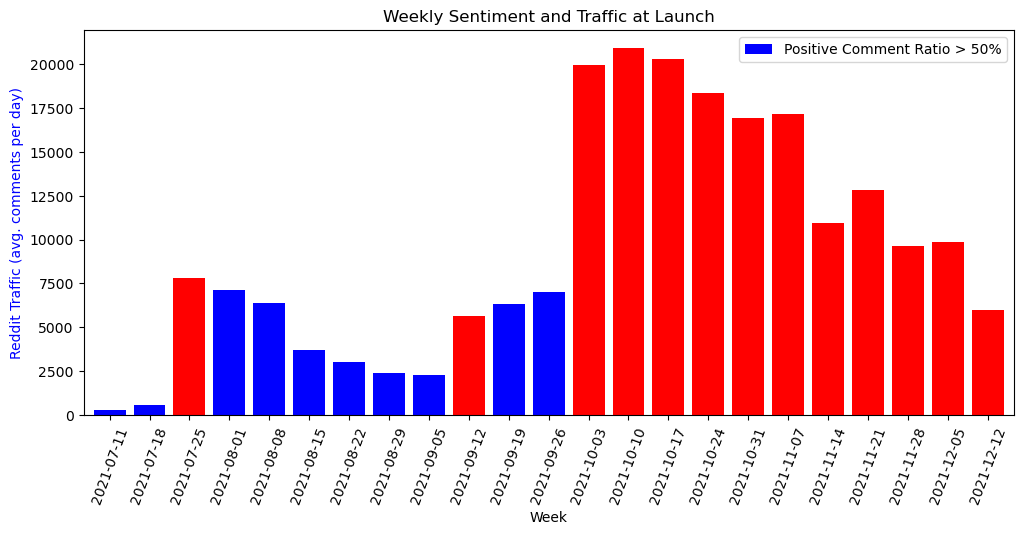

In [25]:
ax = df_graph3['Volume'].plot(kind='bar', figsize=(12, 5), width=0.8, alpha = 1)

# Set bar colors using the function
set_bar_colors(ax, df_graph3['Positive'], 'blue', 'red')
# Set x-axis label and title
ax.set_xlabel('Week')
ax.set_title('Weekly Sentiment and Traffic at Launch')

# Set legend
ax.legend(['Positive Comment Ratio > 50%'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=70)

ax.set_ylabel('Reddit Traffic (avg. comments per day)', color='blue')

# Show the plot
plt.show()